In [ ]:
import zipfile
import os
import tensorflow as tf
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

# Import Dataset

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2022-05-12 14:44:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   266MB/s    in 0.2s    

2022-05-12 14:44:25 (266 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
# Assign training and validation set directories
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

cats_and_dogs_filtered/train/cats
cats_and_dogs_filtered/train/dogs
cats_and_dogs_filtered/validation/cats
cats_and_dogs_filtered/validation/dogs


## Melihat ukuran data

In [17]:
import cv2
idx_file = 1
filename = os.listdir(train_cats_dir)

img = cv2.imread(os.path.join(train_cats_dir, filename[idx_file]), cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)

Original Dimensions :  (214, 425, 3)


# Build Model

In [8]:
model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dense(512, activation='relu'),
      layers.Dense(1, activation='sigmoid')
  ])

# Melihat jumlah parameters

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# preprocessing

In [11]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')


test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode  = 'binary',
    target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Train model

In [12]:
history = model.fit(
            train_generator,
            epochs=20,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/20
100/100 - 31s - loss: 0.7893 - accuracy: 0.5210 - val_loss: 0.6818 - val_accuracy: 0.5760 - 31s/epoch - 307ms/step
Epoch 2/20
100/100 - 18s - loss: 0.6939 - accuracy: 0.5610 - val_loss: 0.6489 - val_accuracy: 0.6210 - 18s/epoch - 176ms/step
Epoch 3/20
100/100 - 18s - loss: 0.6773 - accuracy: 0.5750 - val_loss: 0.6271 - val_accuracy: 0.6380 - 18s/epoch - 176ms/step
Epoch 4/20
100/100 - 18s - loss: 0.6671 - accuracy: 0.6110 - val_loss: 0.6314 - val_accuracy: 0.6660 - 18s/epoch - 176ms/step
Epoch 5/20
100/100 - 18s - loss: 0.6479 - accuracy: 0.6410 - val_loss: 0.6219 - val_accuracy: 0.6420 - 18s/epoch - 176ms/step
Epoch 6/20
100/100 - 18s - loss: 0.6324 - accuracy: 0.6545 - val_loss: 0.5893 - val_accuracy: 0.7020 - 18s/epoch - 176ms/step
Epoch 7/20
100/100 - 18s - loss: 0.6280 - accuracy: 0.6645 - val_loss: 0.5639 - val_accuracy: 0.7250 - 18s/epoch - 176ms/step
Epoch 8/20
100/100 - 19s - loss: 0.6156 - accuracy: 0.6810 - val_loss: 0.5726 - val_accuracy: 0.7080 - 19s/epoch - 189

# melihat akurasi training model dan validation model

In [13]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r-', label='Training Loss')
  plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

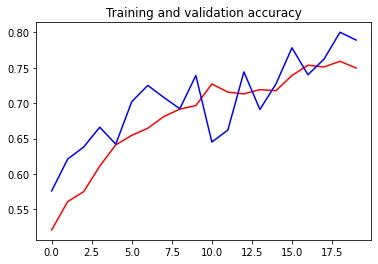

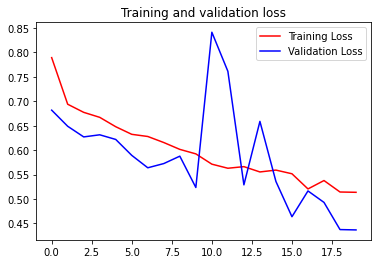

In [14]:
plot_loss_acc(history)

# Mencoba model yang dibuat

In [21]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  print(path)
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " ini adalah gambar anjing")
  else:
    print(fn + " ini adalah gambar kucing")

Saving kucing_1.jpg to kucing_1.jpg
Saving kucing_2.jpeg to kucing_2.jpeg
Saving kucing_3.jpg to kucing_3.jpg
/content/kucing_1.jpg
[0.6675543]
kucing_1.jpg ini adalah gambar anjing
/content/kucing_2.jpeg
[0.02995729]
kucing_2.jpeg ini adalah gambar kucing
/content/kucing_3.jpg
[0.32890233]
kucing_3.jpg ini adalah gambar kucing


# Save Model

In [22]:
model.save('my_model.h5')

# Load Model

In [23]:
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0